In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

Amogus laden.

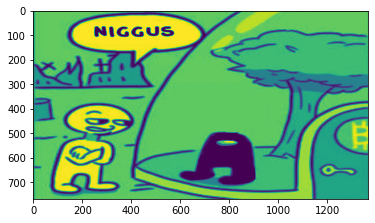

In [6]:
img_amogus = cv2.imread("resources/sample_amogus.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_amogus)

Saftigen Gradienten ziehen

In [7]:
sobel_horz = np.array([1,2,1,
                       0,0,0,
                       -1,-2,-1]).reshape(3,3)
sobel_vert = np.array([1,0,-1,
                       2,0,2,
                       1,0,-1]).reshape(3,3)

img_amogus_sobel_horz = cv2.filter2D(img_amogus, -1, sobel_horz)
img_amogus_sobel_vert = cv2.filter2D(img_amogus, -1, sobel_vert)

img_amogus_gradient_theta = np.arctan2(img_amogus_sobel_horz, img_amogus_sobel_vert)
img_amogus_gradient_r = np.sqrt(img_amogus_sobel_horz**2 + img_amogus_sobel_vert**2)


Gradient als HSV plot

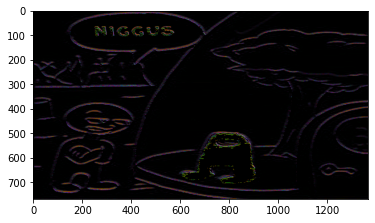

In [8]:
def norm(v):
  return (v - np.min(v)) / (np.max(v) - np.min(v))

img_amogus_gradient_hsv = np.stack([norm(img_amogus_gradient_r),
                                    np.ones(img_amogus_gradient_r.shape),
                                    norm(img_amogus_gradient_theta)], axis=-1)

img_amogus_gradient_rgb = matplotlib.colors.hsv_to_rgb(img_amogus_gradient_hsv)
plt.imshow(img_amogus_gradient_rgb)